# Bank client data:

**Bank client data:**  

1) age (numeric)  
2) job: type of job (categorical:"admin.","bluecollar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")  
3) marital: marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)  
4) education: education of individual (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
5) default: has credit in default? (categorical: "no","yes","unknown")  
6) housing: has housing loan? (categorical: "no","yes","unknown")
7) loan: has personal loan? (categorical: "no","yes","unknown")

### Related with the last contact of the current campaign:  

8) contact: contact communication type (categorical: "cellular","telephone")  
9) month: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")  
10) dayofweek: last contact day of the week (categorical: "mon","tue","wed","thu","fri")  
11) duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.  

**Other attributes:**

12) campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)  
13) pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)  
14) previous: number of contacts performed before this campaign and for this client (numeric)  
15) poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")  

**Social and economic context attributes**

16) emp.var.rate: employment variation rate - quarterly indicator (numeric)
17) cons.price.idx: consumer price index - monthly indicator (numeric)
18) cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19) concave points_se: standard error for number of concave portions of the contour
20) euribor3m: euribor 3 month rate - daily indicator (numeric)
21) nr.employed: number of employees - quarterly indicator (numeric)
Output variable (desired target):
22) y: has the client subscribed a term deposit? (binary: "yes","no")

**Perform the following tasks:**  

Q1. Perform EDA on the given data. What does the primary analysis of several categorical features reveal? 🡪5 marks  

Q.2. Perform the following pre-processing tasks: 🡪10 marks  

a. Missing Value Analysis  
b. Label Encoding wherever required  
c. Selecting important features based on Random Forest  
d. Handling unbalanced data using SMOTE  
e. Standardize the data using any one of the scalers provided by sklearn  

Q.3. Build the following Supervised Learning models: 🡪5 marks  
	a. Logistic Regression  
	b. Decision Trees  
	c. Random Forest  

Q.4. Tabulate the performance metrics of all the above models, perform tuning of models and tell which model performs better in predicting if the client will subscribe to term deposit or not 🡪10 marks


### Perform the following tasks:

#### Q1. Perform EDA on the given data. What does the primary analysis of several categorical features reveal? 🡪5 marks

In [1]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn import metrics
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFE
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import VarianceThreshold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
#pip install mlxtend

In [3]:
# Loading the dataset

bank_df = pd.read_csv(r"bank.csv", sep=';')
bank_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
# Basic Data Exploration.

print("The shape of the data: \n", bank_df.shape)
print("\n\n\n Data types: \n", bank_df.dtypes)

The shape of the data: 
 (41188, 21)



 Data types: 
 age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object


In [5]:
# Checking Statistical summary/ description
bank_df.describe(include="all")

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,12,4,8,3,3,3,2,10,5,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,NaN,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,NaN,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,258.285010,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259.279249,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.000000,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.000000,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,319.000000,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


In [6]:
# Checking info
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
bank_df['y'].value_counts() #Imbalanced DataSet

no     36548
yes     4640
Name: y, dtype: int64

### Visualization

In [8]:
# Creating lists with column names for numeric vs categorical, Dependent vs Independent Variables.

colname_object = []
for x in bank_df.columns:
    if bank_df[x].dtype == 'object':
        colname_object.append(x)

colname_numeric = []
for x in bank_df.columns:
    if bank_df[x].dtype == 'int64' or bank_df[x].dtype == 'float':
        colname_numeric.append(x)
        
temp = bank_df.columns
        
colname_x = temp[:-1]

colname_y = temp[-1]

print("All Features:", temp, "\n\n")
print("Object datatype:", colname_object, "\n\n")
print("Numeric datatype:", colname_numeric, "\n\n")
print("Independent variables:", colname_x, "\n\n")
print("Dependent variables:", colname_y, "\n\n")

All Features: Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object') 


Object datatype: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y'] 


Numeric datatype: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'] 


Independent variables: Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object') 


Dependent variables: y 




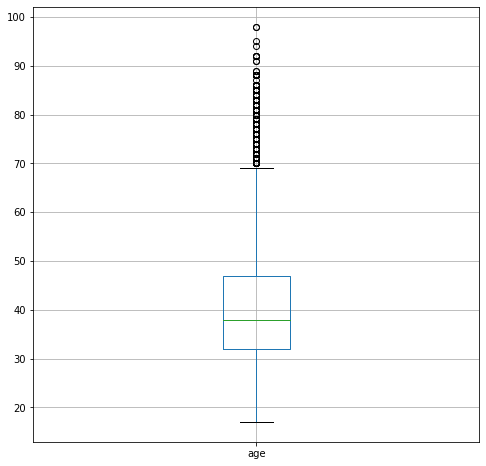

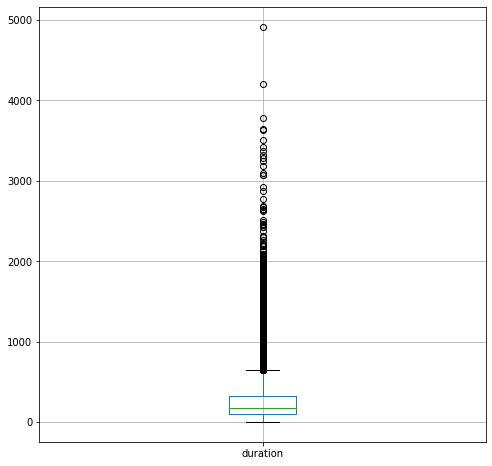

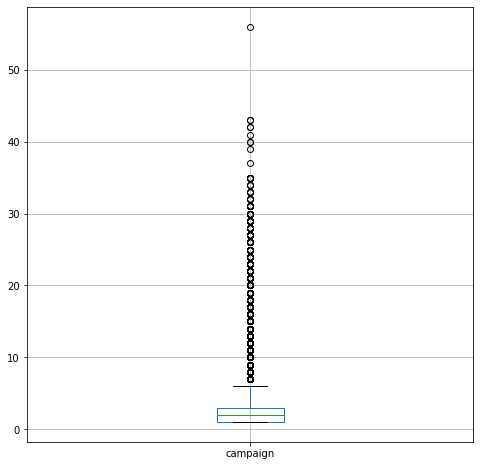

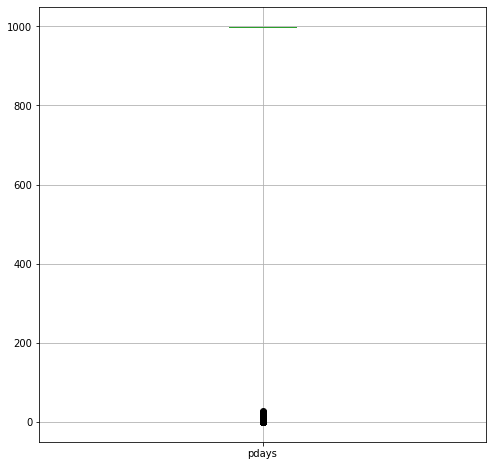

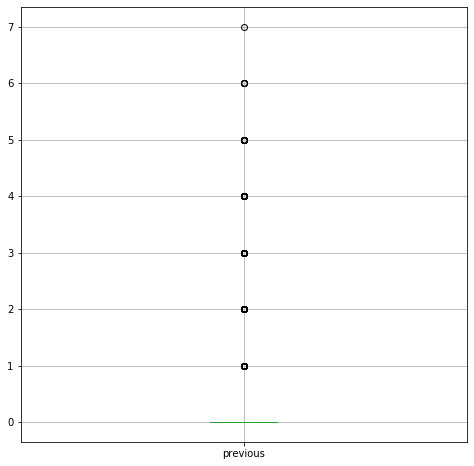

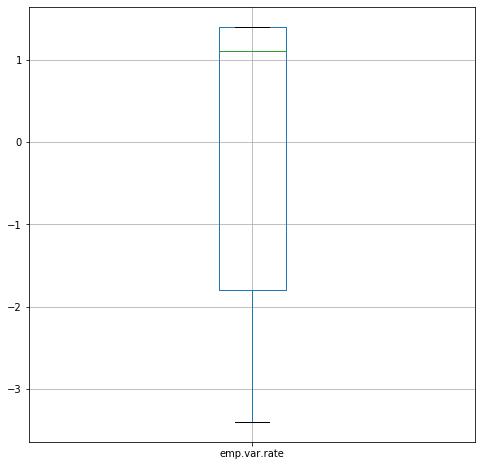

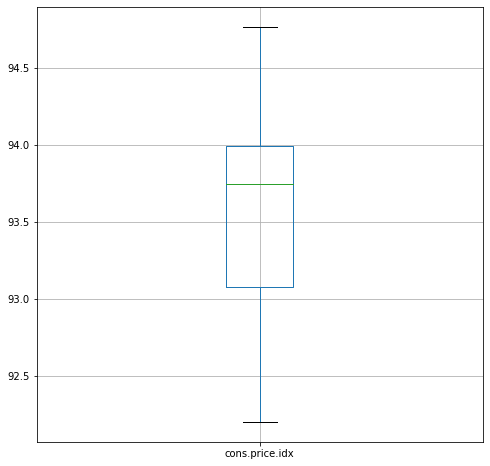

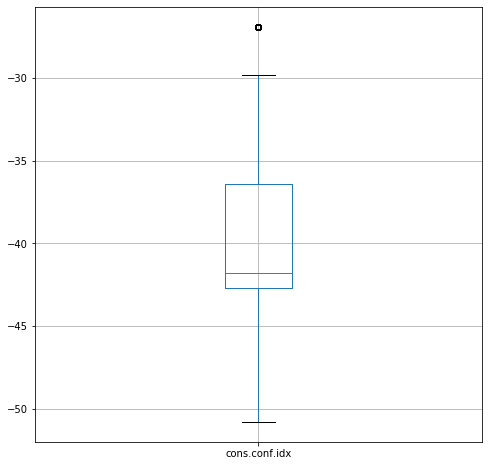

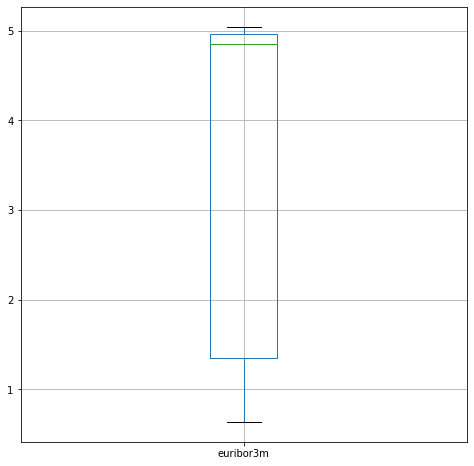

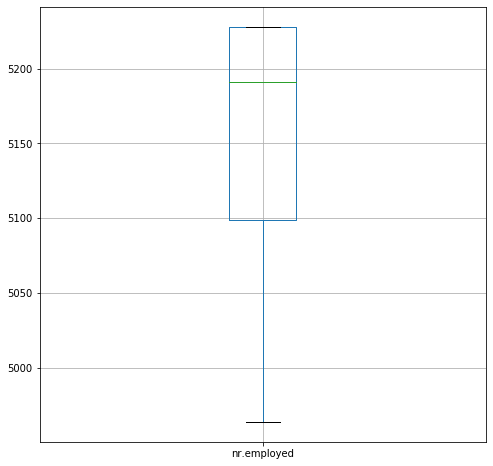

In [9]:
# For Numeric Variables

for i in colname_numeric:
    plt.figure(figsize=(8,8))
    bank_df.boxplot(column=i)
    plt.show();

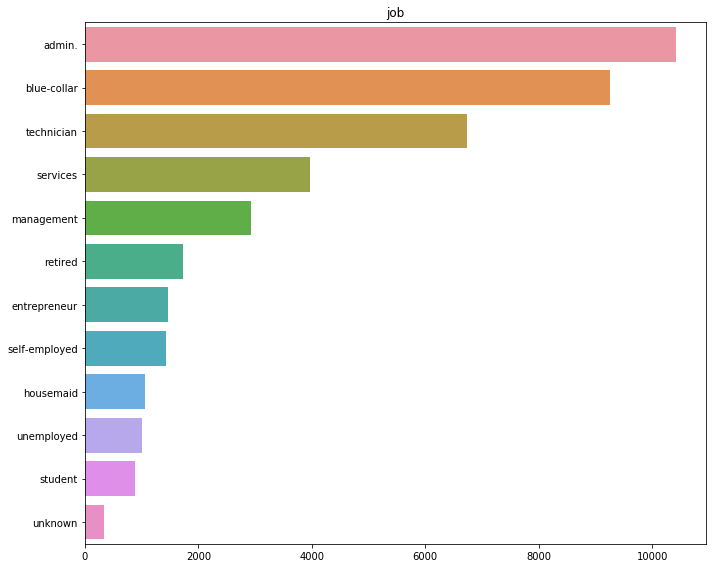

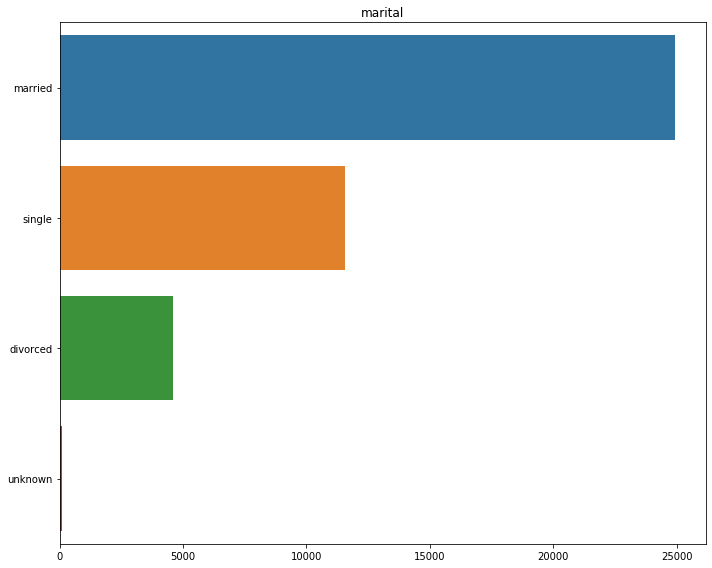

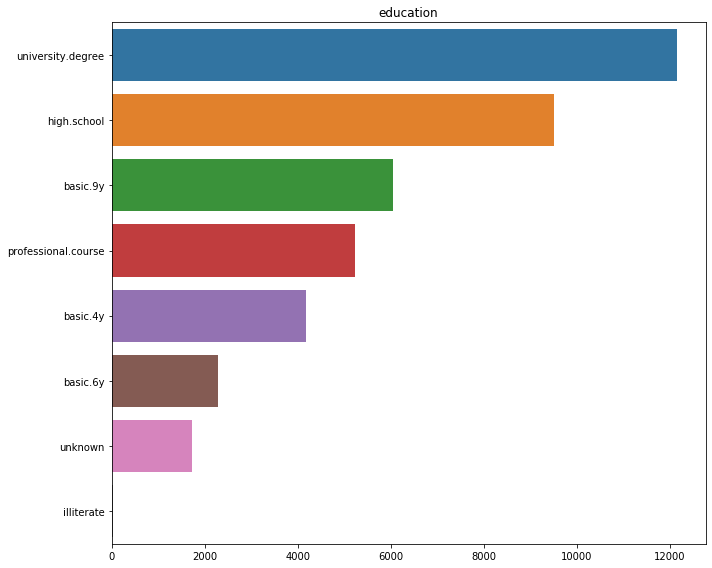

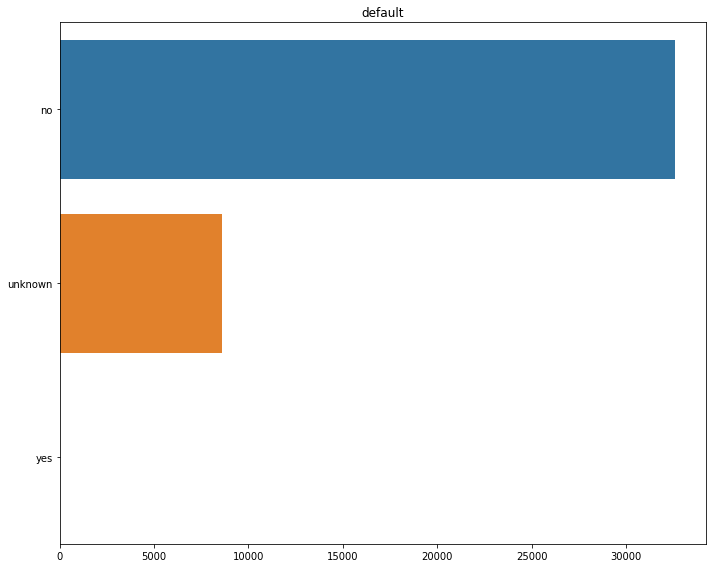

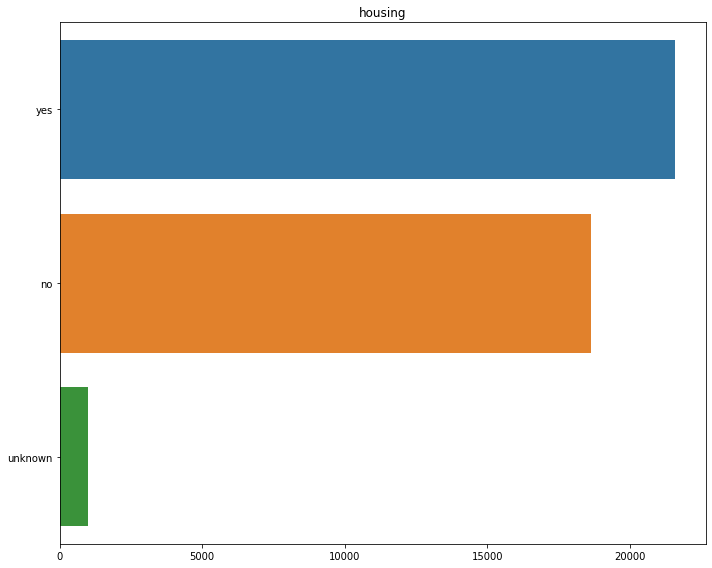

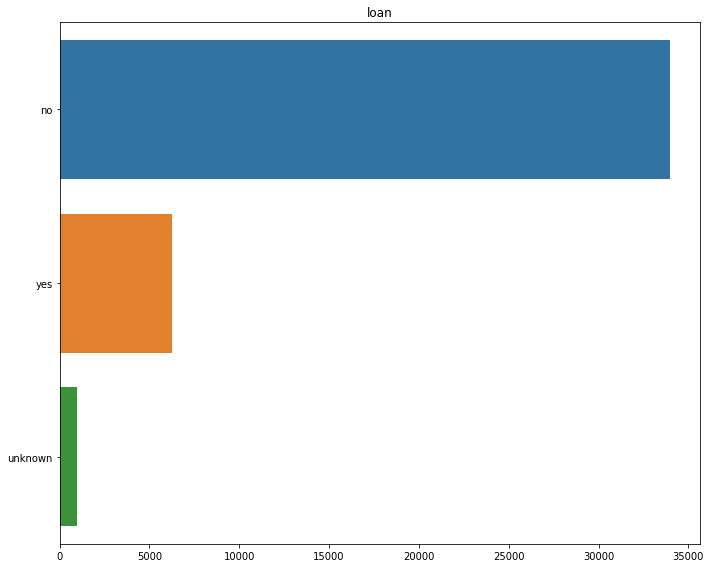

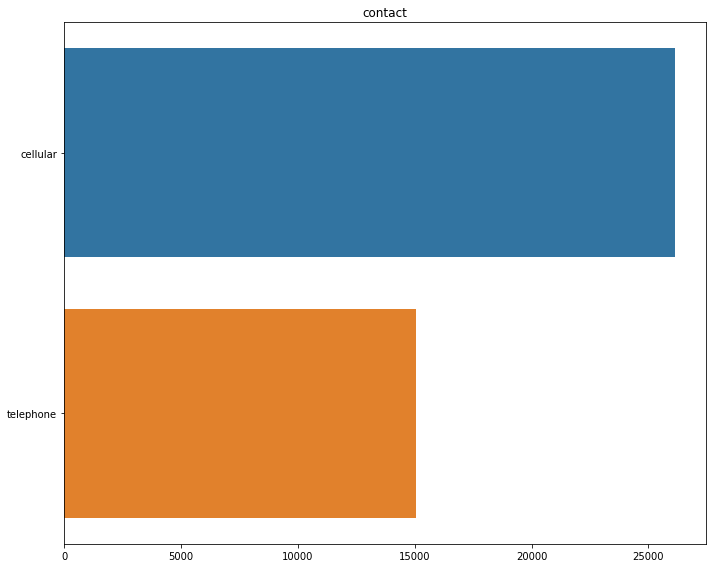

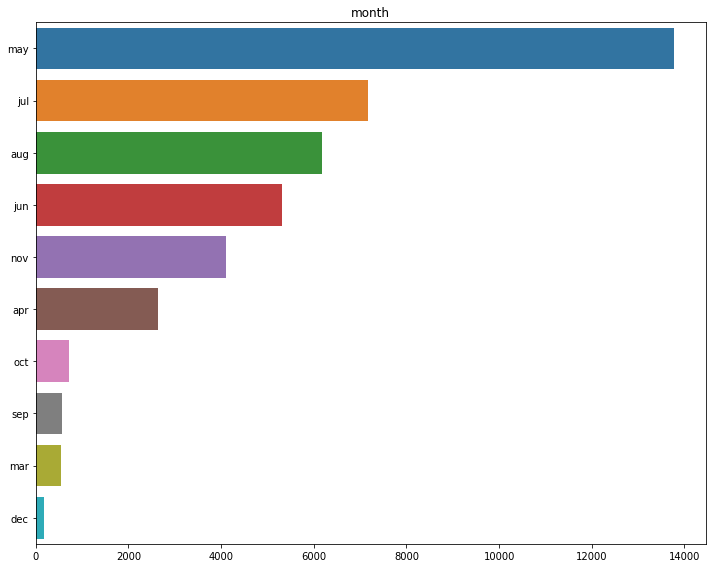

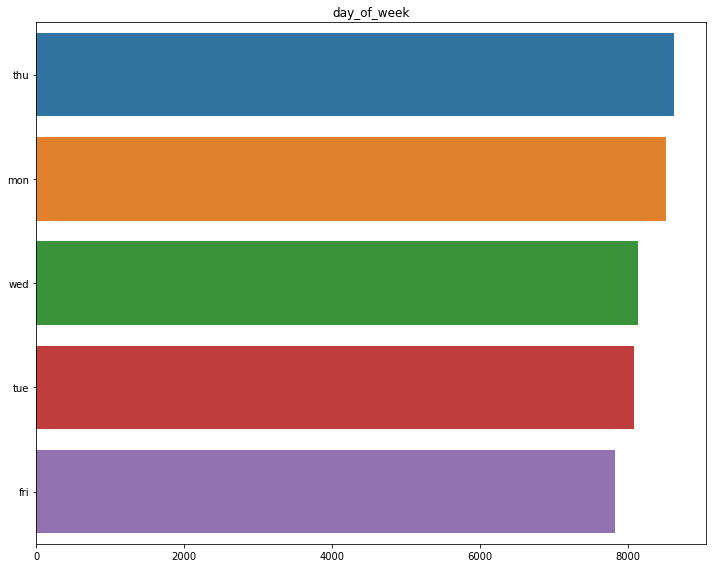

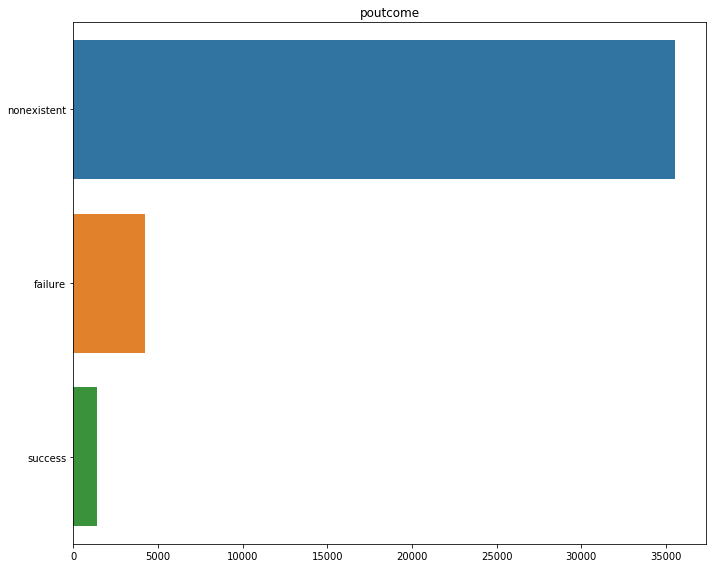

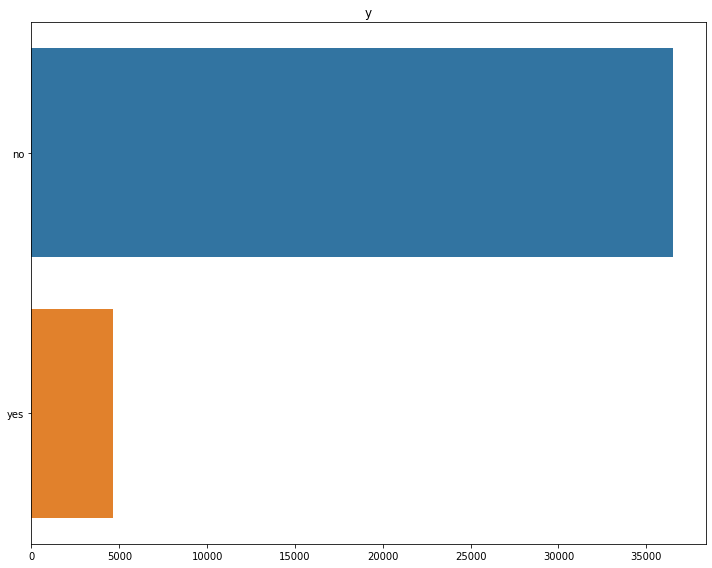

In [10]:
# For categorical Variables

for col in colname_object:
    plt.figure(figsize=(10,8))
    sns.barplot(bank_df[col].value_counts().values, bank_df[col].value_counts().index)
    plt.title(col)
    plt.tight_layout()

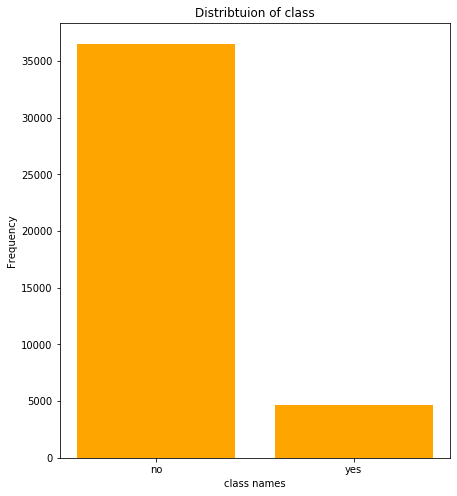

In [11]:
# Dependent variable

names = bank_df["y"].value_counts().keys()
counts = bank_df["y"].value_counts().values
plt.subplots(figsize=(7, 8))
plt.bar(names, counts, color="orange")
plt.xlabel("class names")
plt.ylabel("Frequency")
plt.title("Distribtuion of class")
plt.show()

### Insights:
* We have 41188 rows and 21 columns in our data.
* We have 10 numeric and 10 categorical Independent columns.
* We have 1 categorical Dependent columns.
* Studying the statistical description of the data we suspect that ("duration", "campaign", "precious") might have outliers.
* We have an imbalanced data set, i.e. class 0 observations is way more than class 1.

##### Q.2. Perform the following pre-processing tasks: 🡪10 marks
* a. Missing Value Analysis
* b. Label Encoding wherever required
* c. Selecting important features based on Random Forest
* d. Handling unbalanced data using SMOTE
* e. Standardize the data using any one of the scalers provided by sklearn

**a. Missing Value Analysis**

In [12]:
# Checking for null data
bank_df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [13]:
for x in bank_df.columns:
    print({x:bank_df[x].unique()})
    
# Here we try to check all unique values in every field to see if missing values are present as special-characters("?")

{'age': array([56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 54, 46, 50, 39, 30, 55,
       49, 34, 52, 58, 32, 38, 44, 42, 60, 53, 47, 51, 48, 33, 31, 43, 36,
       28, 27, 26, 22, 23, 20, 21, 61, 19, 18, 70, 66, 76, 67, 73, 88, 95,
       77, 68, 75, 63, 80, 62, 65, 72, 82, 64, 71, 69, 78, 85, 79, 83, 81,
       74, 17, 87, 91, 86, 98, 94, 84, 92, 89], dtype=int64)}
{'job': array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)}
{'marital': array(['married', 'single', 'divorced', 'unknown'], dtype=object)}
{'education': array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)}
{'default': array(['no', 'unknown', 'yes'], dtype=object)}
{'housing': array(['no', 'yes', 'unknown'], dtype=object)}
{'loan': array(['no', 'yes', 'unknown'], dtype=object)}
{'c

In [14]:
bank_df.duplicated().sum()

12

In [15]:
bank_df.drop_duplicates(inplace=True)
bank_df.shape

(41176, 21)

* We confirm that there are no missing values or special characters (wrong data/"?"), in our data.
* There were 12 duplicate records and we dropped them, as very small data loss.

**b. Label Encoding wherever required**

In [16]:
# creating X(Independent Variables) and Y(Dependent Variable)

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for x in colname_object:
    bank_df[x] = le.fit_transform(bank_df[x])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print('Feature', x, ":")
    print('mapping', le_name_mapping)

Feature job :
mapping {'admin.': 0, 'blue-collar': 1, 'entrepreneur': 2, 'housemaid': 3, 'management': 4, 'retired': 5, 'self-employed': 6, 'services': 7, 'student': 8, 'technician': 9, 'unemployed': 10, 'unknown': 11}
Feature marital :
mapping {'divorced': 0, 'married': 1, 'single': 2, 'unknown': 3}
Feature education :
mapping {'basic.4y': 0, 'basic.6y': 1, 'basic.9y': 2, 'high.school': 3, 'illiterate': 4, 'professional.course': 5, 'university.degree': 6, 'unknown': 7}
Feature default :
mapping {'no': 0, 'unknown': 1, 'yes': 2}
Feature housing :
mapping {'no': 0, 'unknown': 1, 'yes': 2}
Feature loan :
mapping {'no': 0, 'unknown': 1, 'yes': 2}
Feature contact :
mapping {'cellular': 0, 'telephone': 1}
Feature month :
mapping {'apr': 0, 'aug': 1, 'dec': 2, 'jul': 3, 'jun': 4, 'mar': 5, 'may': 6, 'nov': 7, 'oct': 8, 'sep': 9}
Feature day_of_week :
mapping {'fri': 0, 'mon': 1, 'thu': 2, 'tue': 3, 'wed': 4}
Feature poutcome :
mapping {'failure': 0, 'nonexistent': 1, 'success': 2}
Feature y 

In [17]:
print(bank_df.dtypes)
bank_df.head()

age                 int64
job                 int32
marital             int32
education           int32
default             int32
housing             int32
loan                int32
contact             int32
month               int32
day_of_week         int32
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome            int32
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                   int32
dtype: object


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


We confirm that we only have numerical variables in the data.

**c. Selecting important features based on Random Forest**

In [18]:
# Creating X(Independent) and Y (Dependent) varialbes
X=bank_df.values[:,0:-1]
Y=bank_df.values[:,-1]

# Splitting the data into test and train data sets.
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.2,random_state=10)

# Predicting using the Decision_Tree_Classifier

# Creating a model object.

from sklearn.tree import DecisionTreeClassifier
model_DecisionTree = RandomForestClassifier(n_estimators=100, random_state=10)

# Fitting the data into our model and predicting the values.

model_DecisionTree.fit(X_train,Y_train)
Y_pred = model_DecisionTree.predict(X_test)

# Building a DataFrame to view the feature importance and sort for a better visual.

feature_imp = pd.DataFrame()
feature_imp["Feature"] = bank_df.columns[0:-1]
feature_imp["Importance"] = model_DecisionTree.feature_importances_ 
feature_imp.sort_values("Importance", ascending = False).style.hide_index()

Feature,Importance
duration,0.319919
euribor3m,0.105372
age,0.092248
nr.employed,0.067681
job,0.048100
education,0.041969
campaign,0.041683
day_of_week,0.039350
pdays,0.033166
poutcome,0.032664


In [19]:
# We see that the influence of the least 5 important features, as per Random Forest is:
print(round((0.008693+0.009710+0.012320+0.015267+0.018113)*100,2), "%")

# We choose to drop these 5 features as they influence the output by only 6.41%
bank_df.drop(["default", "contact", "previous", "loan", "month"], axis=1, inplace=True)
bank_df.columns

6.41 %


Index(['age', 'job', 'marital', 'education', 'housing', 'day_of_week',
       'duration', 'campaign', 'pdays', 'poutcome', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

**d. Handling unbalanced data using SMOTE**

In [20]:
# Creating X(Independent) and Y (Dependent) varialbes
X=bank_df.values[:,0:-1]
Y=bank_df.values[:,-1]

# Splitting the data into test and train data sets.
#from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.2,random_state=10)

print("Before OverSampling, counts of label '1': ", (sum(Y_train == 1)))
print("Before OverSampling, counts of label '0': ", (sum(Y_train == 0)))
  
# import SMOTE from imblearn library
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 10,k_neighbors=5)
X_train_res, Y_train_res = sm.fit_resample(X_train, Y_train)
  
print('After OverSampling, the shape of train_X: ', (X_train_res.shape))
print('After OverSampling, the shape of train_y: ', (Y_train_res.shape))
  
print("After OverSampling, counts of label '1': ", (sum(Y_train_res == 1)))
print("After OverSampling, counts of label '0': ", (sum(Y_train_res == 0)))

Before OverSampling, counts of label '1':  3765
Before OverSampling, counts of label '0':  29175
After OverSampling, the shape of train_X:  (58350, 15)
After OverSampling, the shape of train_y:  (58350,)
After OverSampling, counts of label '1':  29175
After OverSampling, counts of label '0':  29175


**e. Standardize the data using any one of the scalers provided by sklearn**

In [30]:
#from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
scaler.fit(X_train)
X_train_s=scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

##### Q.3. Build the following Supervised Learning models: 🡪5 marks
	a. Logistic Regression
	b. Decision Trees
	c. Random Forest

### a. Logistic Regression

In [31]:
# logistic regression object

lr = LogisticRegression()
  
# train the model on train set
lr.fit(X_train_res, Y_train_res)
  
Y_pred = lr.predict(X_test)

# Evaluating metrics:

cfm = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix: \n", cfm)

acc = accuracy_score(Y_test,Y_pred)
print("\n Accuracy of the model: ", acc)

Report = classification_report(Y_test,Y_pred)
print("\n\n Classification Report: \n", Report)

Confusion Matrix: 
 [[6170 1192]
 [ 134  740]]

 Accuracy of the model:  0.8389995143273433


 Classification Report: 
               precision    recall  f1-score   support

         0.0       0.98      0.84      0.90      7362
         1.0       0.38      0.85      0.53       874

    accuracy                           0.84      8236
   macro avg       0.68      0.84      0.72      8236
weighted avg       0.92      0.84      0.86      8236



### b. Decision Trees

In [32]:
# Building a DecisionTreeClassifier model object

#from sklearn.tree import DecisionTreeClassifier
model_DecisionTree = DecisionTreeClassifier(criterion="gini", random_state=10)

# Fitting the model on the data and predict the values

model_DecisionTree.fit(X_train_res, Y_train_res)
Y_pred = model_DecisionTree.predict(X_test)

# Evaluating metrics:

cfm = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix: \n", cfm)

acc = accuracy_score(Y_test,Y_pred)
print("\n Accuracy of the model: ", acc)

Report = classification_report(Y_test,Y_pred)
print("\n\n Classification Report: \n", Report)

Confusion Matrix: 
 [[6832  530]
 [ 392  482]]

 Accuracy of the model:  0.888052452646916


 Classification Report: 
               precision    recall  f1-score   support

         0.0       0.95      0.93      0.94      7362
         1.0       0.48      0.55      0.51       874

    accuracy                           0.89      8236
   macro avg       0.71      0.74      0.72      8236
weighted avg       0.90      0.89      0.89      8236



### c. Random Forest

In [33]:
# Creating a random forest classifier model object.

model_DecisionTree = RandomForestClassifier(random_state = 10)

# Fitting the model on the data and predict the values

model_DecisionTree.fit(X_train_res, Y_train_res)
Y_pred = model_DecisionTree.predict(X_test)

# Evaluating metrics:

cfm = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix: \n", cfm)

acc = accuracy_score(Y_test,Y_pred)
print("\n Accuracy of the model: ", acc)

Report = classification_report(Y_test,Y_pred)
print("\n\n Classification Report: \n", Report)

Confusion Matrix: 
 [[6955  407]
 [ 357  517]]

 Accuracy of the model:  0.9072365225837785


 Classification Report: 
               precision    recall  f1-score   support

         0.0       0.95      0.94      0.95      7362
         1.0       0.56      0.59      0.58       874

    accuracy                           0.91      8236
   macro avg       0.76      0.77      0.76      8236
weighted avg       0.91      0.91      0.91      8236



##### Q.4. Tabulate the performance metrics of all the above models, perform tuning of models and tell which model performs better in predicting if the client will subscribe to term deposit or not 🡪10 marks

<head>
	<title>Metrics Summary</title> 
	<style>
		table td {
			text-align:center;
		}
	</style>
</head>
<body>
	<table>
		<thead>
			<tr>
                <th><u>Metrics</u></th>
                <th><u>Classes</u></th>
				<th>Base LogisticRegression</th>
				<th>Threshold = 0.47</th>
				<th>Using K-Fold</th>
				<th>Stratified K-Fold</th>
				<th>RFE (0.9) </th>
                <th>SFS(83.416) </th>
                <th>SelectKBest</th>
			</tr>
		</thead>
		<tbody>
			<tr>
				<td>Accuracy</td>
				<td>-</td>
				<td>84.17%</td>
				<td>84.94</td>
				<td>83.90%</td>
				<td>83.86%</td>
				<td>83.95%</td>
                <td>83.68%</td>
                <td>83.90%</td>
			</tr>
			<tr>
				<td>Precision</td>
				<td>class 0</td>
				<td>0.98</td>
				<td>0.86</td>
				<td>0.86</td>
				<td>0.86</td>
				<td>0.86</td>
                <td>0.86</td>
                <td>0.86</td>
			</tr>
			<tr>
				<td>-</td>
				<td>class 1</td>
				<td>0.68</td>
				<td>0.67</td>
				<td>0.69</td>
				<td>0.68</td>
				<td>0.69</td>
                <td>0.68</td>
                <td>0.69</td>
			</tr>
			<tr>
				<td>Recall</td>
				<td>class 0</td>
				<td>0.84</td>
				<td>0.94</td>
				<td>0.95</td>
				<td>0.95</td>
				<td>0.95</td>
                <td>0.95</td>
                <td>0.95</td>
			</tr>
			<tr>
				<td>-</td>
				<td>class 1</td>
				<td>0.84</td>
				<td>0.46</td>
				<td>0.43</td>
				<td>0.43</td>
				<td>0.43</td>
                <td>0.43</td>
                <td>0.43</td>
			</tr>
			<tr>
				<td>F1-Score</td>
				<td>class 0</td>
				<td>0.90</td>
				<td>0.90</td>
				<td>0.90</td>
				<td>0.90</td>
				<td>0.90</td>
                <td>0.90</td>
                <td>0.90</td>
			</tr>
			<tr>
				<td>-</td>
				<td>class 1</td>
				<td>0.53</td>
				<td>0.54</td>
				<td>0.53</td>
				<td>0.53</td>
				<td>0.53</td>
                <td>0.52</td>
                <td>0.53</td>
			</tr>
		</tbody>
	</table>
</body>

## Model Tuning

### A. Logistic regression

In [34]:
# logistic regression object

classifier = LogisticRegression()
  
# train the model on train set
classifier.fit(X_train_res, Y_train_res)
  
# Predicting using .predict_proba and storing the predicted probabilities

y_pred_prob = classifier.predict_proba(X_test)
#print(y_pred_prob)

In [35]:
# Adjusting the threshold

# printing type I and type II errors for every threshold in range (0.4-0.6)

least_error = []
type_1 = []
type_2 = []

for a in np.arange(0.4,0.61,0.01):
    predict_mine = np.where(y_pred_prob[:,1] > a, 1, 0)
    cfm = confusion_matrix(Y_test, predict_mine)
    total_err = cfm[0,1]+cfm[1,0]
    type_1.append(cfm[0,1])
    type_2.append(cfm[1,0])
    least_error.append(total_err)
    print("Errors at threshold ", a, ":", total_err, " , type 2 error:", cfm[1,0]," , type 1 error :", cfm[0,1])

Errors at threshold  0.4 : 1597  , type 2 error: 90  , type 1 error : 1507
Errors at threshold  0.41000000000000003 : 1563  , type 2 error: 92  , type 1 error : 1471
Errors at threshold  0.42000000000000004 : 1544  , type 2 error: 99  , type 1 error : 1445
Errors at threshold  0.43000000000000005 : 1516  , type 2 error: 103  , type 1 error : 1413
Errors at threshold  0.44000000000000006 : 1483  , type 2 error: 105  , type 1 error : 1378
Errors at threshold  0.45000000000000007 : 1458  , type 2 error: 108  , type 1 error : 1350
Errors at threshold  0.4600000000000001 : 1439  , type 2 error: 112  , type 1 error : 1327
Errors at threshold  0.4700000000000001 : 1402  , type 2 error: 117  , type 1 error : 1285
Errors at threshold  0.4800000000000001 : 1378  , type 2 error: 122  , type 1 error : 1256
Errors at threshold  0.4900000000000001 : 1351  , type 2 error: 129  , type 1 error : 1222
Errors at threshold  0.5000000000000001 : 1326  , type 2 error: 134  , type 1 error : 1192
Errors at th

In [36]:
# Sorting our errors in ascending order
least_error.sort()
type_2.sort()
type_1.sort()

# Displaying errors in ascending order

print("Total errors:", least_error, "\n")
print("Type 2 errors:", type_2, "\n")
print("Type 1 errors:", type_1, "\n")

# Finding least errors

print("Least total error:", min(least_error))
print("Least type 2 error:", min(type_2))
print("Least type 1 error:", min(type_1))

Total errors: [1088, 1120, 1138, 1166, 1187, 1205, 1226, 1252, 1271, 1307, 1326, 1351, 1378, 1402, 1439, 1458, 1483, 1516, 1544, 1563, 1597] 

Type 2 errors: [90, 92, 99, 103, 105, 108, 112, 117, 122, 129, 134, 142, 146, 150, 152, 157, 166, 171, 177, 182, 184] 

Type 1 errors: [904, 938, 961, 995, 1021, 1048, 1074, 1102, 1125, 1165, 1192, 1222, 1256, 1285, 1327, 1350, 1378, 1413, 1445, 1471, 1507] 

Least total error: 1088
Least type 2 error: 90
Least type 1 error: 904


In [37]:
# We consider threshold as 0.6 and predict.

y_pred_class = []
for value in y_pred_prob[:,1]:
    if value > 0.6:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)
# print(y_pred_class)

print("Confusion Matrix: \n\n", confusion_matrix(Y_test, y_pred_class)) 
print("\n Accuracy of the model: ", accuracy_score(Y_test, y_pred_class))
print("\n\n Classification Report: \n\n", classification_report(Y_test, y_pred_class))

Confusion Matrix: 

 [[6458  904]
 [ 184  690]]

 Accuracy of the model:  0.8678970373967946


 Classification Report: 

               precision    recall  f1-score   support

         0.0       0.97      0.88      0.92      7362
         1.0       0.43      0.79      0.56       874

    accuracy                           0.87      8236
   macro avg       0.70      0.83      0.74      8236
weighted avg       0.92      0.87      0.88      8236



### Cross validation K-Fold

In [38]:
classifier=LogisticRegression()

# Performing kfold_cross_validation
#from sklearn.model_selection import KFold
kfold_cv=KFold(n_splits=10,random_state=10,shuffle=True)
# print(kfold_cv)

#from sklearn.model_selection import cross_val_score
# Running the model using scoring metric as accuracy
kfold_cv_result=cross_val_score(estimator=classifier,X=X_train_s, y=Y_train, cv=kfold_cv)

print("\n K-fold cross-validation Scores: \n",kfold_cv_result)
# finding the mean
print("\n K-fold cross-validation mean:", kfold_cv_result.mean())  # Avg of all 10 accuracy scores


 K-fold cross-validation Scores: 
 [0.9195507  0.92410443 0.90619308 0.90619308 0.90012143 0.91074681
 0.90437158 0.90801457 0.90771099 0.91287189]

 K-fold cross-validation mean: 0.9099878567091683


* This step is not required and is cost expensive.  
* We need to skip it as the values are very close.  
* This step is to be implemented only when there is a drastic difference (>3%) between the accuracy scores.

## B. Decision Tree

In [39]:
# Building a Pruned DecisionTreeClassifier model object

#from sklearn.tree import DecisionTreeClassifier
model_DecisionTree = DecisionTreeClassifier(criterion="gini", random_state=10, max_depth=6, min_samples_leaf=5)

# Fitting the model on the data and predict the values

model_DecisionTree.fit(X_train_res, Y_train_res)
Y_pred = model_DecisionTree.predict(X_test)

# Evaluating metrics:

cfm = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix: \n", cfm)

acc = accuracy_score(Y_test,Y_pred)
print("\n Accuracy of the model: ", acc)

Report = classification_report(Y_test,Y_pred)
print("\n\n Classification Report: \n", Report)

Confusion Matrix: 
 [[6333 1029]
 [ 126  748]]

 Accuracy of the model:  0.8597620203982516


 Classification Report: 
               precision    recall  f1-score   support

         0.0       0.98      0.86      0.92      7362
         1.0       0.42      0.86      0.56       874

    accuracy                           0.86      8236
   macro avg       0.70      0.86      0.74      8236
weighted avg       0.92      0.86      0.88      8236



### C. Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

model_DecisionTree = RandomForestClassifier(n_estimators=100,
                                             random_state=10,
                                             max_depth=10,
                                             min_samples_leaf=5,
                                             bootstrap=True)

model_DecisionTree.fit(X_train_res, Y_train_res)
Y_pred = model_DecisionTree.predict(X_test)

cfm = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix: \n", cfm)

acc = accuracy_score(Y_test, Y_pred)
print("\nAccuracy of the model: ", acc)

Report = classification_report(Y_test, Y_pred)
print("\n\nClassification Report:\n", Report)

Confusion Matrix: 
 [[6628  734]
 [ 175  699]]

Accuracy of the model:  0.8896308887809616


Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.90      0.94      7362
         1.0       0.49      0.80      0.61       874

    accuracy                           0.89      8236
   macro avg       0.73      0.85      0.77      8236
weighted avg       0.92      0.89      0.90      8236



<head>
    <title>Metrics Summary</title> 
    <style>
        table td {
            text-align:center;
        }
    </style>
</head>
<body>
    <table>
        <thead>
            <tr>
                <th><u>Metrics</u></th>
                <th><u>Classes</u></th>
                <th>Base LogisticRegression</th>
                <th>Base DecisionTree</th>
                <th>Base RandomForest</th>
                <th>LogReg using 0.6 threshold</th>
                <th>Pruned DecisionTree</th>
                <th>Pruned Random Forest</th>
            </tr>
        </thead>
        <tbody>
            <tr>
                <td>Accuracy</td>
                <td>-</td>
                <td>84.17%</td>
                <td>84.94</td>
                <td>83.90%</td>
                <td>83.86%</td>
                <td>83.95%</td>
                <td>83.68%</td>
            </tr>
            <tr>
                <td>Precision</td>
                <td>class 0</td>
                <td>0.98</td>
                <td>0.86</td>
                <td>0.86</td>
                <td>0.86</td>
                <td>0.86</td>
                <td>0.86</td>
            </tr>
            <tr>
                <td>-</td>
                <td>class 1</td>
                <td>0.68</td>
                <td>0.67</td>
                <td>0.69</td>
                <td>0.68</td>
                <td>0.69</td>
                <td>0.68</td>
            </tr>
            <tr>
                <td>Recall</td>
                <td>class 0</td>
                <td>0.84</td>
                <td>0.94</td>
                <td>0.95</td>
                <td>0.95</td>
                <td>0.95</td>
                <td>0.95</td>
            </tr>
            <tr>
                <td>-</td>
                <td>class 1</td>
                <td>0.84</td>
                <td>0.46</td>
                <td>0.43</td>
                <td>0.43</td>
                <td>0.43</td>
                <td>0.43</td>
            </tr>
            <tr>
                <td>F1-Score</td>
                <td>class 0</td>
                <td>0.90</td>
                <td>0.90</td>
                <td>0.90</td>
                <td>0.90</td>
                <td>0.90</td>
                <td>0.90</td>
            </tr>
            <tr>
                <td>-</td>
                <td>class 1</td>
                <td>0.53</td>
                <td>0.54</td>
                <td>0.53</td>
                <td>0.53</td>
                <td>0.53</td>
                <td>0.52</td>
            </tr>
        </tbody>
    </table>
</body>

**We see that our pruned Random Forest model gives us the best metrics for class 1 and hence we will go ahead with its predictions**

We see that our evaluation metrics are good. We will dump our predictions to an excel file.

In [43]:
# We will now dump our final_df to an excel file

df_final.to_csv("Predictions.csv")

### ---------------------------------------------------------- END OF EXAM -----------------------------------------------------------------------------